In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import mibian
import numpy as np
import scipy as sp
import sys

/Users/jteruya/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Matlabplot Display Parameters

In [2]:
# Display Plot within Jupyter Notebook
%matplotlib inline
# Default Plot Size
plt.rcParams['figure.figsize'] = [10, 10]

## Platform Dependent Environment Variables
Ensuring the home directory is used regardless of OS type:
- Windows OS : `HOMEDRIVE`
- Mac/Linux/Unix OS : `HOME`

In [3]:
env_home = os.getenv('HOMEDRIVE') if sys.platform.startswith('win') else os.getenv('HOME')

## Load Vix Historical File
This file was loaded from [here](https://finance.yahoo.com/quote/%5EVIX/history/)

In [4]:
# Data File Location
vix_data = env_home + '/Documents/platypus/vix/vix_20200509.csv'
# Load File into Dataframe
vix_df = pd.read_csv(vix_data)
# Convert Date Field to Datetime Object
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
# Set Index to Date Field
vix_df.set_index(['Date'], inplace=True)

## Load Citi Historical File
This file was loaded from [here](https://finance.yahoo.com/quote/C/history?period1=1575849600&period2=1588982400&interval=1d&filter=history&frequency=1d)

In [5]:
# Data File Location
citi_data = env_home + '/Documents/platypus/citi/citi_20200509.csv'
# Load File into Dataframe
citi_df = pd.read_csv(citi_data)
# Convert Date Field to Datetime Object
citi_df['Date'] = pd.to_datetime(citi_df['Date'])
# Set Index to Date Field
citi_df.set_index(['Date'], inplace=True)

## Calculate Historical Volatility
The historical volatility calculation was taken from [here](https://www.investopedia.com/ask/answers/021015/how-can-you-calculate-volatility-excel.asp)

In [6]:
def return_on_price(current_price, previous_price):
    return (current_price/previous_price) - 1

citi_df['Adj Close Shift'] = citi_df['Adj Close'].shift(1)
citi_df['Adj Close Price Return'] = citi_df.apply(lambda row : return_on_price(row['Adj Close'], row['Adj Close Shift']), axis = 1)
citi_df['Rolling Volatility'] = np.sqrt(30) * citi_df['Adj Close Price Return'].rolling(30).std() * 100

## Visualization of VIX and Citi

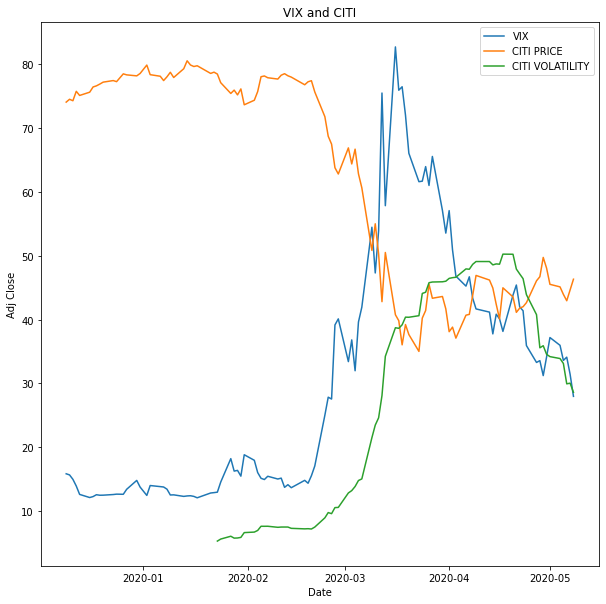

In [7]:
plt.plot(vix_df['Adj Close'], label="VIX")
plt.plot(citi_df['Adj Close'], label="CITI PRICE")
plt.plot(citi_df['Rolling Volatility'], label="CITI VOLATILITY")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('VIX and CITI')
plt.legend()
plt.show()

## Getting the Range of Key Variables

In [8]:
vix_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.0
mean,30.868000,33.370000,28.385333,30.684191,30.684191,0.0
std,19.198663,21.379843,17.013789,19.159846,19.159846,0.0
min,12.200000,12.420000,11.710000,12.100000,12.100000,0.0
25%,14.430000,15.240000,13.390000,13.850000,13.850000,0.0
50%,23.280001,29.570000,22.620001,27.559999,27.559999,0.0
75%,43.000000,45.730000,40.840000,41.939999,41.939999,0.0
max,82.690002,85.470001,70.370003,82.690002,82.690002,0.0


In [9]:
citi_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Shift,Adj Close Price Return,Rolling Volatility
count,105.000000,105.000000,105.000000,105.000000,105.000000,1.050000e+02,104.000000,104.000000,75.000000
mean,62.930762,63.935429,61.777143,62.781429,61.972926,2.255766e+07,62.123435,-0.003072,27.417209
std,16.802385,16.420692,17.348533,16.872858,16.499307,1.166389e+07,16.506618,0.053394,17.210452
min,35.470001,37.990002,32.000000,35.389999,35.018318,4.576200e+06,35.018318,-0.192986,5.321289
25%,44.169998,45.590000,43.000000,44.259998,43.950001,1.176340e+07,43.911290,-0.023598,7.640231
50%,72.629997,73.209999,69.000000,69.430000,68.700813,2.397070e+07,70.234535,-0.002083,30.044939
75%,78.699997,79.050003,78.059998,78.690002,77.419518,3.152860e+07,77.478581,0.014239,45.827974
max,81.959999,83.110001,80.970001,81.910004,80.515900,5.165000e+07,80.515900,0.179843,50.245917


## Scaling Vix, Citi Price, Citi Volatility

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()

In [12]:
vix_scaled = min_max_scaler.fit_transform(vix_df[['Adj Close']])

In [13]:
index = vix_df.index
vix_scaled = pd.DataFrame(vix_scaled, index=index)

In [14]:
citivol_scaled = min_max_scaler.fit_transform(citi_df[['Rolling Volatility']])

In [15]:
index = citi_df.index
citivol_scaled = pd.DataFrame(citivol_scaled, index=index)

In [16]:
citiprice_scaled = min_max_scaler.fit_transform(citi_df[['Adj Close']])

In [17]:
citiprice_scaled = pd.DataFrame(citiprice_scaled, index=index)

## VIX vs CITI Price vs CITI Volatility 

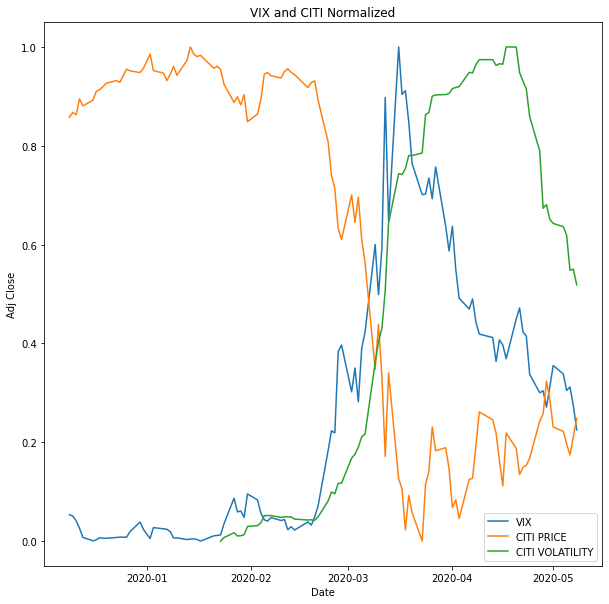

In [18]:
plt.plot(vix_scaled, label="VIX")
plt.plot(citiprice_scaled, label="CITI PRICE")
plt.plot(citivol_scaled, label="CITI VOLATILITY")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('VIX and CITI Normalized')
plt.legend()
plt.show()

## Investigating Correlation

In [19]:
scaled_data = [pd.DataFrame(citiprice_scaled), pd.DataFrame(citivol_scaled), pd.DataFrame(vix_scaled)]

In [20]:
df_scaled = pd.concat(scaled_data, axis =1, join='outer', ignore_index=False, keys=['citiprice_scaled', 'citivol_scaled', 'vix_scaled'],
          levels=None, names=None, verify_integrity=False, copy=True)

In [21]:
df_scaled = df_scaled.dropna(axis='rows')

In [22]:
df_scaled.corr()

,,citiprice_scaled,citivol_scaled,vix_scaled
,,0,0,0
citiprice_scaled,0,1.000000,-0.940928,-0.827008
citivol_scaled,0,-0.940928,1.000000,0.714761
vix_scaled,0,-0.827008,0.714761,1.000000


## Fitting Data Using Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
lr = LinearRegression()

### CITI Price vs CITI Volatility

In [25]:
X = df_scaled['citiprice_scaled']
y = df_scaled['citivol_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, X_train))

Coefficients: 
 [[-1.02516741]]
Mean squared error: 0.51
Coefficient of determination: -2.64


In [28]:
citivol_y_pred = lr.predict(X_test)

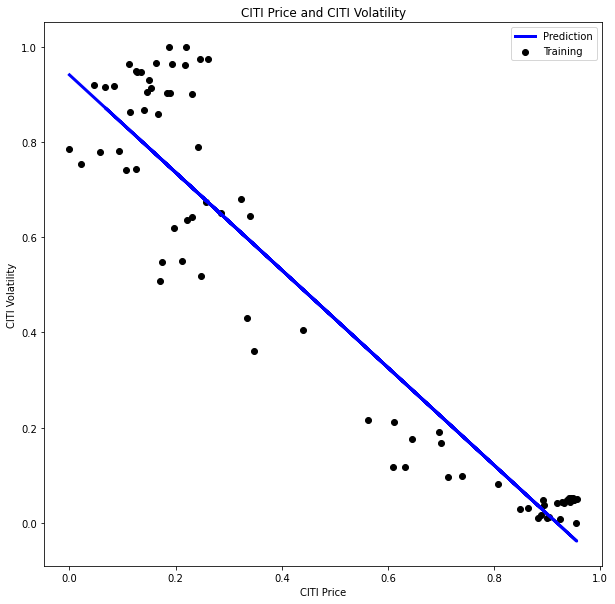

In [29]:
plt.scatter(X,y, color='black', label='Training')
plt.plot(X_test, citivol_y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('CITI Price')
plt.ylabel('CITI Volatility')
plt.title('CITI Price and CITI Volatility')
plt.legend()
plt.show()

### VIX vs CITI Volatility

In [30]:
# vix vs citi vol
X = df_scaled['vix_scaled']
y = df_scaled['citivol_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, X_train))

Coefficients: 
 [[0.91692779]]
Mean squared error: 0.10
Coefficient of determination: 0.24


In [33]:
citivol_y_pred = lr.predict(X_test)

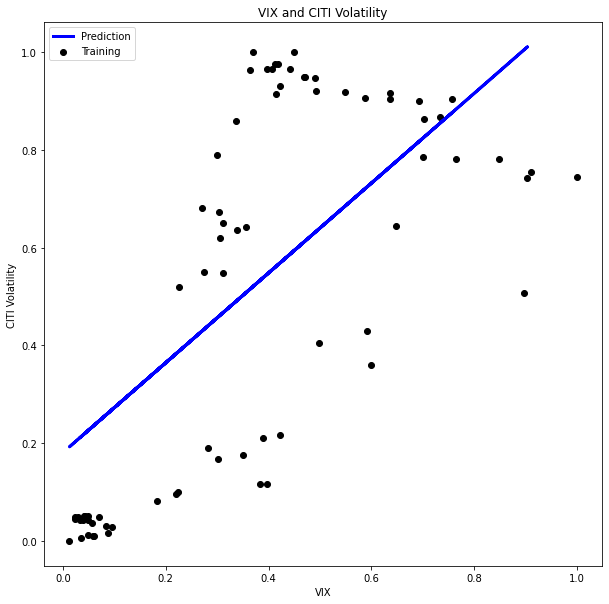

In [34]:
plt.scatter(X,y, color='black', label='Training')
plt.plot(X_test, citivol_y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('VIX')
plt.ylabel('CITI Volatility')
plt.title('VIX and CITI Volatility')
plt.legend()
plt.show()

### VIX vs CITI Price

In [35]:
# vix vs citi price
X = df_scaled['vix_scaled']
y = df_scaled['citiprice_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, X_train))

Coefficients: 
 [[-1.03849994]]
Mean squared error: 0.33
Coefficient of determination: -1.88


In [38]:
citiprice_y_pred = lr.predict(X_test)

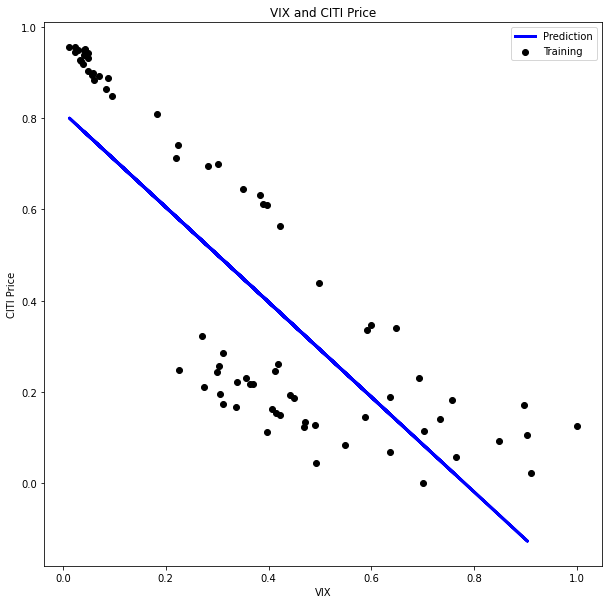

In [39]:
plt.scatter(X,y, color='black', label='Training')
plt.plot(X_test, citiprice_y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('VIX')
plt.ylabel('CITI Price')
plt.title('VIX and CITI Price')
plt.legend()
plt.show()